In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import hashlib
from skimage import img_as_float
from sklearn.cross_validation import train_test_split

%matplotlib inline

ImageDataSet/ImagesTrampolines/1.png


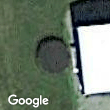

ImageDataSet/ImagesTrampolines/2.png


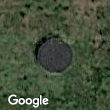

ImageDataSet/ImagesTrampolines/3.png


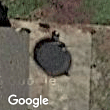

ImageDataSet/ImagesTrampolines/4.png


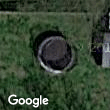

ImageDataSet/ImagesTrampolines/5.png


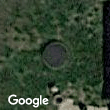

ImageDataSet/ImagesTrampolines/6.png


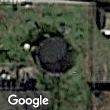

ImageDataSet/ImagesTrampolines/7.png


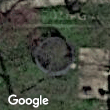

ImageDataSet/ImagesTrampolines/8.png


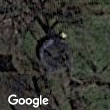

ImageDataSet/ImagesTrampolines/9.png


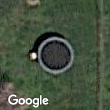

In [4]:
#Display Trampolines
for i in range(1,10):
    img_name = "ImageDataSet/ImagesTrampolines/" + str(i) + ".png"
    print(img_name)
    img = Image(img_name)
    display(img)

ImageDataSet/ImagesNoTrampolines/1_A.png


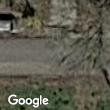

ImageDataSet/ImagesNoTrampolines/2_A.png


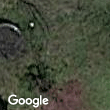

ImageDataSet/ImagesNoTrampolines/3_A.png


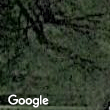

ImageDataSet/ImagesNoTrampolines/4_A.png


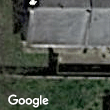

ImageDataSet/ImagesNoTrampolines/1_B.png


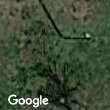

ImageDataSet/ImagesNoTrampolines/2_B.png


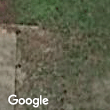

ImageDataSet/ImagesNoTrampolines/3_B.png


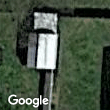

ImageDataSet/ImagesNoTrampolines/4_B.png


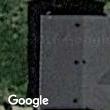

In [8]:
#Display NoTrampolines
for i in range(1,5):
    img_name = "ImageDataSet/ImagesNoTrampolines/" + str(i) + "_A.png"
    print(img_name)
    img = Image(img_name)
    display(img)
    
for i in range(1,5):
    img_name = "ImageDataSet/ImagesNoTrampolines/" + str(i) + "_B.png"
    print(img_name)
    img = Image(img_name)
    display(img)

In [25]:
from skimage import img_as_float
import skimage.io as io

pathTrampolines="ImageDataSet/ImagesTrampolines/"
pathNoTrampolines="ImageDataSet/ImagesNoTrampolines/"

image_size = 60
ncolors = 3

image_files_Trampolines = os.listdir(pathTrampolines)
image_files_NoTrampolines = os.listdir(pathNoTrampolines)

datasetImgColors_Trampolines = np.ndarray(shape=(len(image_files_Trampolines), image_size, image_size, ncolors), dtype=np.float32)
datasetImgFlatten_Trampolines = np.ndarray(shape=(len(image_files_Trampolines), image_size, image_size), dtype=np.float32)

datasetImgColors_NoTrampolines = np.ndarray(shape=(len(image_files_NoTrampolines), image_size, image_size, ncolors), dtype=np.float32)
datasetImgFlatten_NoTrampolines = np.ndarray(shape=(len(image_files_NoTrampolines), image_size, image_size), dtype=np.float32)

image_index = 0
for img_file in sorted(os.listdir(pathTrampolines)):
    
    # !This sorting is 1,10,11,12,2,20
    #img_name = "ImageDataSet/Images/" + str(image_index + 1) + ".png"
    img_name = pathTrampolines+img_file
    
    imageColors = io.imread(img_name)
    imageColors = imageColors[...,0:3] # remove alpha
    imageFlatten = io.imread(img_name, flatten=True) #with flatten
    
    croppedColors = imageColors[25:85,25:85]
    croppedFlatten = imageFlatten[25:85,25:85]
    
    datasetImgColors_Trampolines[image_index, :, :, :] = img_as_float(croppedColors)
    datasetImgFlatten_Trampolines[image_index, :, :] = img_as_float(croppedFlatten)
    image_index += 1

    
image_index = 0
for img_file in sorted(os.listdir(pathNoTrampolines)):
    
    # !This sorting is 1,10,11,12,2,20
    #img_name = "ImageDataSet/Images/" + str(image_index + 1) + ".png"
    img_name = pathNoTrampolines+img_file
    
    imageColors = io.imread(img_name)
    imageColors = imageColors[...,0:3] # remove alpha
    imageFlatten = io.imread(img_name, flatten=True) #with flatten
    
    croppedColors = imageColors[25:85,25:85]
    croppedFlatten = imageFlatten[25:85,25:85]
    
    datasetImgColors_NoTrampolines[image_index, :, :, :] = img_as_float(croppedColors)
    datasetImgFlatten_NoTrampolines[image_index, :, :] = img_as_float(croppedFlatten)
    image_index += 1




print("Trampolines: " + str(datasetImgColors_Trampolines.shape))
print("Trampolines flatten: " + str(datasetImgColors_NoTrampolines.shape))

print("No Trampolines: " + str(datasetImgFlatten_NoTrampolines.shape))
print("No Trampolines flatten: " + str(datasetImgFlatten_NoTrampolines.shape))


Trampolines: (712, 60, 60, 3)
Trampolines flatten: (1404, 60, 60, 3)
No Trampolines: (1404, 60, 60)
No Trampolines flatten: (1404, 60, 60)


In [27]:
datasetImgColors = np.concatenate((datasetImgColors_Trampolines, datasetImgColors_NoTrampolines), axis=0)
datasetImgFlatten = np.concatenate((datasetImgFlatten_Trampolines, datasetImgFlatten_NoTrampolines), axis=0)

print('Full dataset tensor (colors):', datasetImgColors.shape)
print('Mean (colors):', np.mean(datasetImgColors))
print('Standard deviation (colors):', np.std(datasetImgColors))

print('Full dataset tensor (flatten):', datasetImgFlatten.shape)
print('Mean (flatten):', np.mean(datasetImgFlatten))
print('Standard deviation (flatten):', np.std(datasetImgFlatten)) 

Full dataset tensor (colors): (2116, 60, 60, 3)
Mean (colors): 0.293081
Standard deviation (colors): 0.166826
Full dataset tensor (flatten): (2116, 60, 60)
Mean (flatten): 0.309623
Standard deviation (flatten): 0.165899


In [28]:
# Save files

set_filename = "colorTrampolines.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(datasetImgColors, f, pickle.HIGHEST_PROTOCOL)
    
    
set_filename = "flattenTrampolines.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(datasetImgFlatten, f, pickle.HIGHEST_PROTOCOL)

In [29]:
# Load files
with open('colorTrampolines.pickle', 'rb') as handle:
  colorDataSet = pickle.load(handle)
with open('flattenTrampolines.pickle', 'rb') as handle:
  flattenDataSet = pickle.load(handle)


In [55]:
#Fill ones
labelsColors_Trampolines = np.ndarray(shape=(len(image_files_Trampolines),1), dtype=np.int32)
labelsFlatten_Trampolines = np.ndarray(shape=(len(image_files_Trampolines),1), dtype=np.int32)

labelsColors_Trampolines.fill(1)
labelsFlatten_Trampolines.fill(1)

#Fill zeros
labelsColors_NoTrampolines = np.ndarray(shape=(len(image_files_NoTrampolines),1), dtype=np.int32)
labelsFlatten_NoTrampolines = np.ndarray(shape=(len(image_files_NoTrampolines),1), dtype=np.int32)

labelsColors_NoTrampolines.fill(0)
labelsFlatten_NoTrampolines.fill(0)

# Coctenate
labelsImgColors = np.concatenate((labelsColors_Trampolines, labelsColors_NoTrampolines), axis=0)
labelsImgFlatten = np.concatenate((labelsFlatten_Trampolines, labelsFlatten_NoTrampolines), axis=0)


# Save files
set_filename = "lbl_colorTrampolines.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(labelsImgColors, f, pickle.HIGHEST_PROTOCOL)
    
    
set_filename = "lbl_flattenTrampolines.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(labelsImgFlatten, f, pickle.HIGHEST_PROTOCOL)


In [56]:
# Load lables
with open('lbl_colorTrampolines.pickle', 'rb') as handle:
  labels_colorDataSet = pickle.load(handle)
with open('lbl_flattenTrampolines.pickle', 'rb') as handle:
  labels_flattenDataSet = pickle.load(handle)

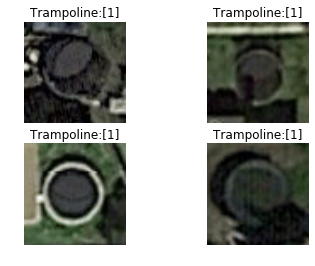

In [69]:
#Tests 

fig=plt.figure()

for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    ax.imshow(colorDataSet[i,...])
    ax.set_title('Trampoline:' + str(labels_colorDataSet[i]))
    ax.axis('off')

plt.show()   

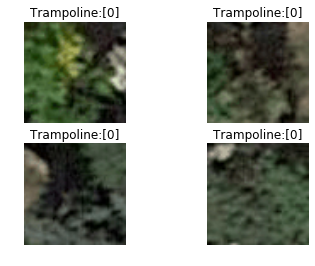

In [68]:
#Tests 

fig=plt.figure()

for i in range(1001,1005):
    ax=fig.add_subplot(2,2,i-1000)        
    ax.imshow(colorDataSet[i,...])
    ax.set_title('Trampoline:' + str(labels_colorDataSet[i]))
    ax.axis('off')

plt.show()   


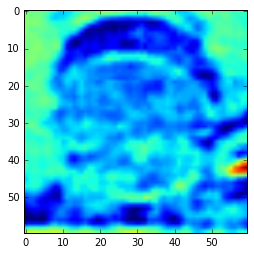

In [80]:

X_train, X_test, y_train, y_test = train_test_split(colorDataSet, labels_colorDataSet, test_size=0.3, random_state=1980)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print("---")
print("X train:" + str(X_train.shape))
print("X test:" + str(X_test.shape))
print("X validation:" + str(X_val.shape))

print("---")
print("y train:" + str(y_train.shape))
print("y test:" + str(y_test.shape))
print("y validation:" + str(y_test.shape))


X_train_fltn, X_test_fltn, y_train_fltn, y_test_fltn = train_test_split(flattenDataSet, labels_flattenDataSet, test_size=0.3, random_state=1980)
X_test_fltn, X_val_fltn, y_test_fltn, y_val_fltn = train_test_split(X_test_fltn, y_test_fltn, test_size=0.5)

print("---")
print("X flatten train:" + str(X_train_fltn.shape))
print("X flatten test:" + str(X_test_fltn.shape))
print("X flatten validation:" + str(X_val_fltn.shape))

print("---")
print("y flatten train:" + str(y_train_fltn.shape))
print("y flatten test:" + str(y_test_fltn.shape))
print("y flatten validation:" + str(y_val_fltn.shape))



---
X train:(1481, 60, 60, 3)
X test:(317, 60, 60, 3)
X validation:(318, 60, 60, 3)
---
y train:(1481, 1)
y test:(317, 1)
y validation:(317, 1)
---
X flatten train:(1481, 60, 60)
X flatten test:(317, 60, 60)
X flatten validation:(318, 60, 60)
---
y flatten train:(1481, 1)
y flatten test:(317, 1)
y flatten validation:(318, 1)


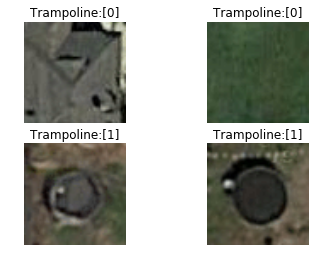

In [81]:
fig=plt.figure()
for i in range(501,505):
    ax=fig.add_subplot(2,2,i-500)        
    ax.imshow(X_train[i,...])
    ax.set_title('Trampoline:' + str(y_train[i]))
    ax.axis('off')

plt.show()   

In [91]:
#Test color dataset
from sklearn.linear_model import LogisticRegression

n_samples = len(X_train)
image_len = image_size * image_size * ncolors

print(n_samples)
print(X_train.shape)

## reshape img data to 1d array
train_dataset_color = X_train.reshape(n_samples, image_len)
train_labels_color = y_train[:n_samples]
train_labels_color = train_labels_color.ravel()

## create and fit the classifier
clf = LogisticRegression(random_state=1980, multi_class='multinomial', solver='newton-cg')
clf.fit(train_dataset_color, train_labels_color)

1481
(1481, 60, 60, 3)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=1980, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
## score the model on validation set
valid_dataset_reshape = np.reshape(X_val, (len(X_val), image_len))
valid_labels_reshape = y_val.ravel()

print('Mean accuracy: {}'.format(clf.score(valid_dataset_reshape, valid_labels_reshape)))

Mean accuracy: 0.918238993711


In [96]:
## show a classification report
from sklearn import metrics

print(metrics.classification_report(valid_labels_reshape, clf.predict(valid_dataset_reshape)))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       212
          1       0.91      0.84      0.87       106

avg / total       0.92      0.92      0.92       318



In [98]:
## look at softmax probabilities of predicted labels
n = 10
print( 'Labels:', np.hstack((valid_labels_reshape[:n], valid_labels_reshape[-n:])) )
preds = clf.predict_proba(np.vstack((valid_dataset_reshape[:n], valid_dataset_reshape[-n:])))
print( 'Predict:', [np.argmax(x) for x in preds] )
for i in preds:
    print('Chose {:d}, Softmax {:.4f}'.format(np.argmax(i), max(i)))
    print(np.around(i, decimals=4))

Labels: [0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1]
Predict: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
Chose 0, Softmax 0.6640
[ 0.664  0.336]
Chose 0, Softmax 0.9795
[ 0.9795  0.0205]
Chose 0, Softmax 0.9994
[  9.99400000e-01   6.00000000e-04]
Chose 0, Softmax 0.9926
[ 0.9926  0.0074]
Chose 0, Softmax 0.9794
[ 0.9794  0.0206]
Chose 1, Softmax 0.9811
[ 0.0189  0.9811]
Chose 0, Softmax 0.6506
[ 0.6506  0.3494]
Chose 0, Softmax 0.9499
[ 0.9499  0.0501]
Chose 1, Softmax 0.5904
[ 0.4096  0.5904]
Chose 0, Softmax 0.9987
[ 0.9987  0.0013]
Chose 1, Softmax 0.8058
[ 0.1942  0.8058]
Chose 1, Softmax 0.9327
[ 0.0673  0.9327]
Chose 0, Softmax 0.9974
[ 0.9974  0.0026]
Chose 0, Softmax 0.9925
[ 0.9925  0.0075]
Chose 0, Softmax 0.9664
[ 0.9664  0.0336]
Chose 1, Softmax 0.8301
[ 0.1699  0.8301]
Chose 0, Softmax 0.9733
[ 0.9733  0.0267]
Chose 0, Softmax 0.9764
[ 0.9764  0.0236]
Chose 1, Softmax 0.9927
[ 0.0073  0.9927]
Chose 1, Softmax 0.9601
[ 0.0399  0.9601]


[[ 0.99821175  0.00178825]]


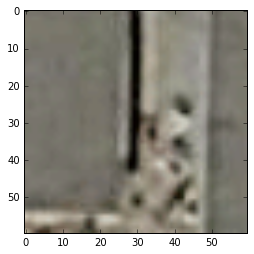

In [110]:
#Check some tests
test_dataset_reshape = np.reshape(X_test, (len(X_test), image_len))
test_labels_reshape = y_test.ravel()

plt.imshow(X_test[100,...])
preds_100 = clf.predict_proba(test_dataset_reshape[100].reshape(1, -1))
print(preds_100)




[[  4.14281526e-04   9.99585718e-01]]


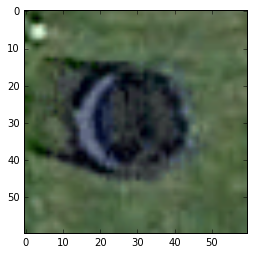

In [114]:
plt.imshow(X_test[123,...])
preds_123 = clf.predict_proba(test_dataset_reshape[123].reshape(1, -1))
print(preds_123)

In [115]:
## SAVE Train Test Valid / Dataset Labels # WITH COLORS
#!!!!

# Save train
set_filename = "train_dataset_Colors.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(X_train, f, pickle.HIGHEST_PROTOCOL)
set_filename = "train_labels_Colors.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(y_train, f, pickle.HIGHEST_PROTOCOL)

# Save test
set_filename = "test_dataset_Colors.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(X_test, f, pickle.HIGHEST_PROTOCOL)
set_filename = "test_labels_Colors.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(y_test, f, pickle.HIGHEST_PROTOCOL)
    
# Save valid
set_filename = "valid_dataset_Colors.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(X_val, f, pickle.HIGHEST_PROTOCOL)
set_filename = "valid_labels_Colors.pickle"
with open(set_filename, 'wb') as f:
    pickle.dump(y_val, f, pickle.HIGHEST_PROTOCOL)